In [58]:
import pandas as pd
import numpy as np
import pickle
import json
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
pd.set_option('display.max_rows', 2000)
sns.set(rc={'figure.figsize': (15, 10)})
# %matplotlib inline

In [6]:
def get_missing(Series):
    
    nrow_df = df.shape[0]
    missing_values = round(df.isnull().sum() / nrow_df, 2).sort_values(ascending=False)
    
    return missing_values

In [11]:
def handle_dataframe(df):

    
    def extract_number_from_squares(x):
    
        if isinstance(x, float):
            value = x
        else:
            value = float(x.split(' ')[0])
    
        return value

    
    columns_order = [#'ид', 
                     'район', 'адрес', 
                     'вид',
                     'год постройки', 'материал', 
                     'этажность', 'этаж', 'тип квартиры', 'цена', 'общая площадь', 
                     'жилая', 'кухня', 'количество комнат', 'отделка', 'санузел', 
                     'балкон/лоджия', 'дата добавления', 'дата истечения']
    
    rename_columns = {#'ид': 'ID', 
                      'район': 'District', 
                      'адрес': 'Address', 
                      'вид': 'Sales_Type', 
                      'год постройки': 'Year_Building', 
                      'материал': 'Material', 
                      'этажность': 'Floors_In_Building', 
                      'этаж': 'Floor', 
                      'тип квартиры': 'Apartment_Type', 
                      'цена': 'Price', 
                      'общая площадь': 'Square_Total', 
                      'жилая': 'Square_Living', 
                      'кухня': 'Square_Kitchen', 
                      'количество комнат': 'Rooms_Number', 
                      'отделка': 'Apartment_Condition', 
                      'санузел': 'Bathroom_Type', 
                      'балкон/лоджия': 'Balcony_Loggia', 
                      'дата добавления': 'Date_Add', 
                      'дата истечения': 'Date_Expiration'}
    
    df[['общая площадь','кухня','жилая']] = df[['общая площадь','кухня','жилая']].applymap(extract_number_from_squares)    
        
    df['дата добавления'] = pd.to_datetime(df['дата добавления'], format='%d.%m.%Y %H:%M:%S')
    df['дата истечения'] = pd.to_datetime(df['дата истечения'], format='%d.%m.%Y')
    df['этаж'] = [int(i[0]) if i[0].isdigit() else 0 for i in df['этаж/этажность'].str.split('/')]
    df['цена'] = df['цена'] / 1000
    
    df.drop(['этаж/этажность', 'ид'], axis=1, inplace=True)
    
    df = df[columns_order]
    df = df.rename(columns = rename_columns)
    
    return df

## So... let's go start.
Прежде всего следует отбросить квартиры, относящиеся к первичному рынку недвижимости, так как они не должны принимать участие в анализе.

In [12]:
df = handle_dataframe(pd.read_json('data.json', orient='index'))
df = df[df['Sales_Type'] == 'вторичное']
df.head()

,District,Address,Sales_Type,Year_Building,Material,Floors_In_Building,Floor,Apartment_Type,Price,Square_Total,Square_Living,Square_Kitchen,Rooms_Number,Apartment_Condition,Bathroom_Type,Balcony_Loggia,Date_Add,Date_Expiration
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4353796,советский район,Фрунзе проспект 126,вторичное,1975.0,кирпич,5,3,гостинка,1250.0,18.0,NaN,NaN,1,в хорошем состоянии,совмещенный,NaN,2020-03-15 10:29:07,2020-04-12
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4207812,советский район,Вершинина 7,вторичное,1996.0,кирпич,5,2,NaN,13900.0,200.0,NaN,NaN,4,в отличном состоянии,раздельный,"лоджия, остекление",2020-03-12 22:44:17,2020-06-10
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4398582,советский район,Источная 10,вторичное,2009.0,монолит,7,5,NaN,6900.0,81.4,NaN,NaN,3,в отличном состоянии,раздельный,лоджия,2020-03-15 10:29:09,2020-04-12
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4119652,советский район,Енисейская 4,вторичное,1987.0,кирпич,9,5,секционка,1750.0,33.0,NaN,NaN,2,в отличном состоянии,раздельный,NaN,2020-03-15 10:25:13,2020-05-27
https://www.tomsk.ru09.ru/realty?subaction=detail&id=4368552,ленинский район,Заозерный переулок 16/2,вторичное,1972.0,кирпич,5,3,гостинка,1100.0,17.2,13.0,NaN,1,NaN,NaN,NaN,2020-03-15 10:07:04,2020-04-29


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9684 entries, https://www.tomsk.ru09.ru/realty?subaction=detail&id=4353796 to https://www.tomsk.ru09.ru/realty?subaction=detail&id=4330986
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   District             9684 non-null   object        
 1   Address              9684 non-null   object        
 2   Sales_Type           9684 non-null   object        
 3   Year_Building        8296 non-null   float64       
 4   Material             9600 non-null   object        
 5   Floors_In_Building   9684 non-null   int64         
 6   Floor                9684 non-null   int64         
 7   Apartment_Type       1894 non-null   object        
 8   Price                9684 non-null   float64       
 9   Square_Total         9684 non-null   float64       
 10  Square_Living        2796 non-null   float64       
 11  Square_Kitchen       3125 non-null   

## Анализ признаков без взаимодействий

Начать стоит с анализа распределений различных признаков по отдельности, а начать лучше всего со стоимости.

In [33]:
df.columns.tolist()

['District',
 'Address',
 'Sales_Type',
 'Year_Building',
 'Material',
 'Floors_In_Building',
 'Floor',
 'Apartment_Type',
 'Price',
 'Square_Total',
 'Square_Living',
 'Square_Kitchen',
 'Rooms_Number',
 'Apartment_Condition',
 'Bathroom_Type',
 'Balcony_Loggia',
 'Date_Add',
 'Date_Expiration']

#  Price

In [94]:
print('Missing values:', sum(df['Price'].isna()))
df['Price'].describe()

Missing values: 0


count     9684.000000
mean      2973.248136
std       2283.446865
min        300.000000
25%       1720.000000
50%       2500.000000
75%       3500.000000
max      42000.000000
Name: Price, dtype: float64

Из описания признака видно, что наименьшей стоимостью является 300 т.р., медианной 2500 т.р., а наибольшим значением является 42000 т.р. (42 миллиона рублей)
<br>
Следует построить гистрограмму распределения

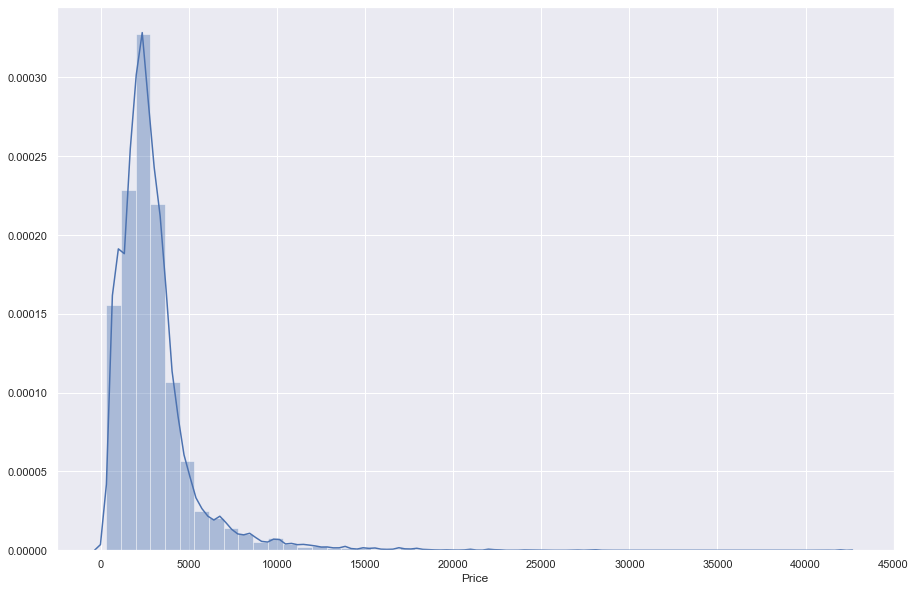

In [15]:
plot = sns.distplot(df['Price'])
plot.set_xticks(np.arange(0, 50000,5000))
plt.show()

Как и предполагалось, ряд имеет ярко выраженную ассиметрию. Эта ситуация весьма типична для рынка недвижимости, так как при большом количестве однородных квартир существует крайне малое количество дорогих квартир.


In [ ]:
# quantils = []
# values = []
# distr = []

# for j in df['District'].unique().tolist():
#     for i in np.arange(0, 1, 0.01):
#         values.append(df.loc[df['District'] == j, 'Price'].quantile(i))
#         quantils.append(i)
#         distr.append(j)

# plot = sns.lineplot(quantils, values, hue=distr)
# plot.set_xticks(np.arange(0, 1,0.05))
# plot.set_yticks(np.arange(0, 12000, 1000));

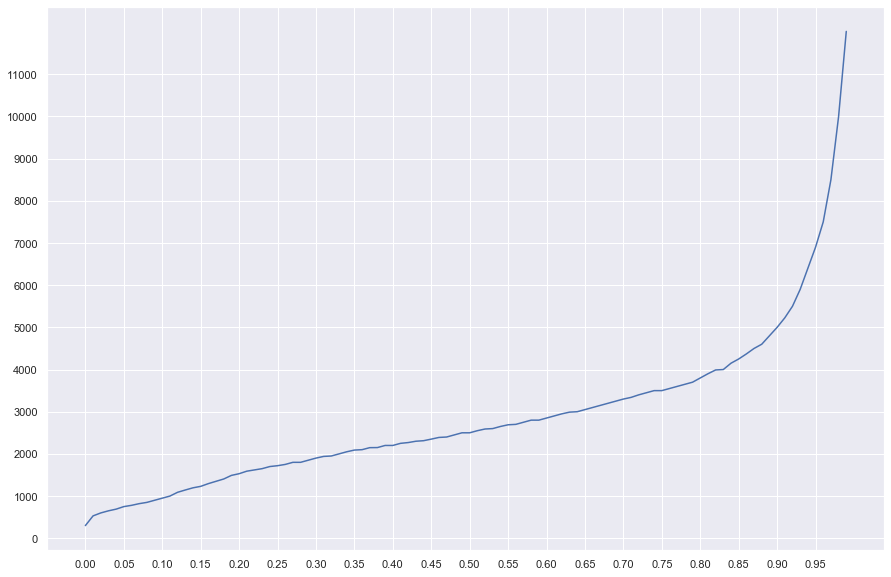

In [71]:
quantils = []
values = []

for i in np.arange(0, 1, 0.01):
    values.append(df['Price'].quantile(i))
    quantils.append(i)

plot = sns.lineplot(quantils, values)
plot.set_xticks(np.arange(0, 1,0.05))
plot.set_yticks(np.arange(0, 12000, 1000));

Как видно из графика, практически 90% квартир обладают стоимостью менее 5000 т.р. 
<br> 
В такой ситуации имеет место фильтрация данных, которая будет проводиться в дальнейшем

# Square_Total

In [95]:
print('Missing values:', sum(df['Square_Total'].isna()))
df['Square_Total'].describe()

Missing values: 0


count    9684.000000
mean       49.333177
std        28.567493
min         4.000000
25%        31.000000
50%        44.400000
75%        62.250000
max       410.000000
Name: Square_Total, dtype: float64

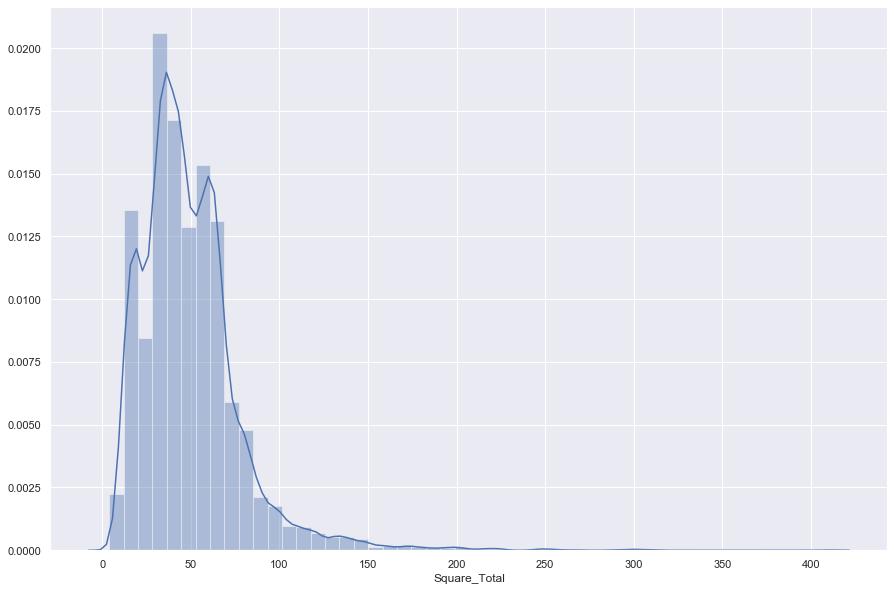

In [78]:
plot = sns.distplot(df['Square_Total'])
plot.set_xticks(np.arange(0, 450,50))
plt.show()

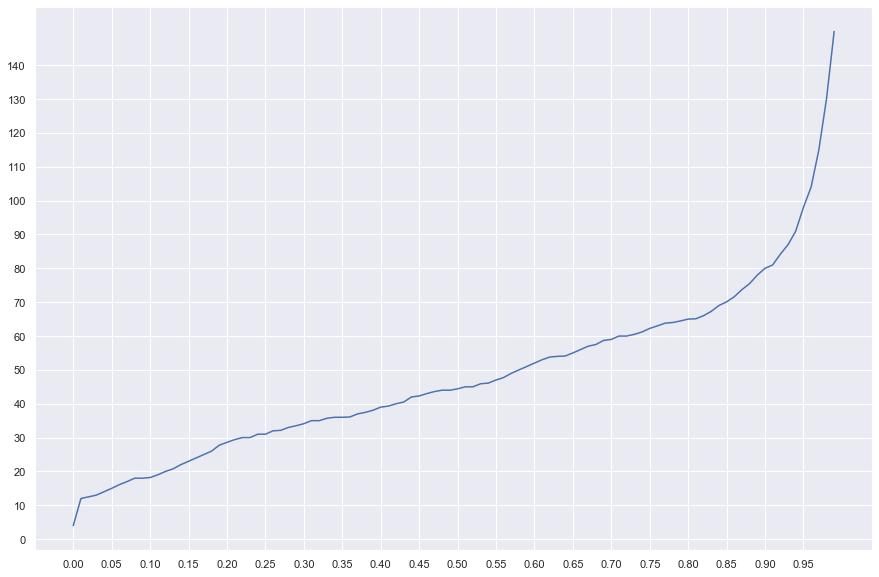

In [81]:
quantils = []
values = []

for i in np.arange(0, 1, 0.01):
    values.append(df['Square_Total'].quantile(i))
    quantils.append(i)

plot = sns.lineplot(quantils, values)
plot.set_xticks(np.arange(0, 1,0.05))
plot.set_yticks(np.arange(0, 150, 10));

Поведение признака Square_Total подобно признаку Price, так как именно Square_Total сильнее всего влияет на Price.

# Square_Kitchen

In [96]:
print('Missing values:', sum(df['Square_Kitchen'].isna()))
df['Square_Kitchen'].describe()

Missing values: 6559


count    3125.000000
mean        9.305485
std         4.000842
min         1.000000
25%         7.000000
50%         8.900000
75%        11.000000
max        45.000000
Name: Square_Kitchen, dtype: float64

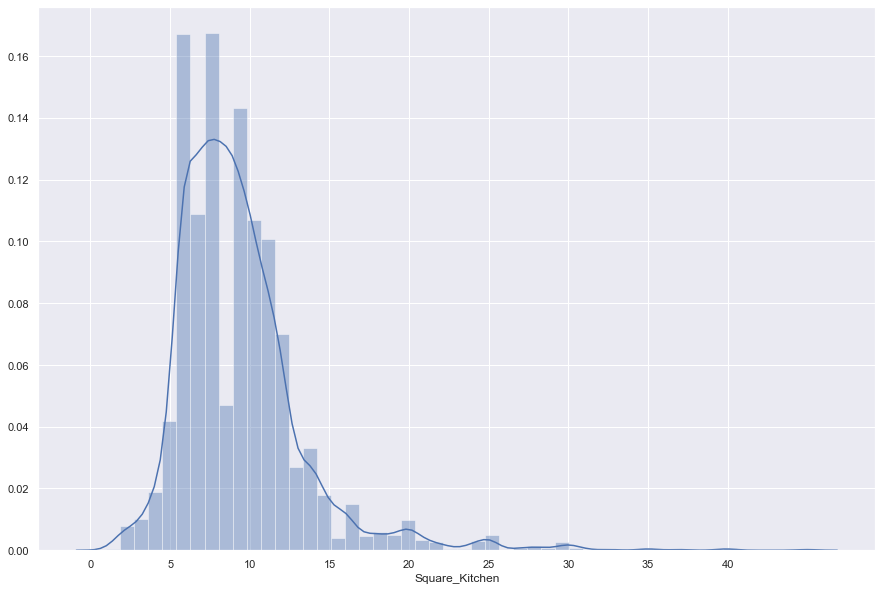

In [98]:
plot = sns.distplot(df['Square_Kitchen'])
plot.set_xticks(np.arange(0, 45,5))
plt.show()

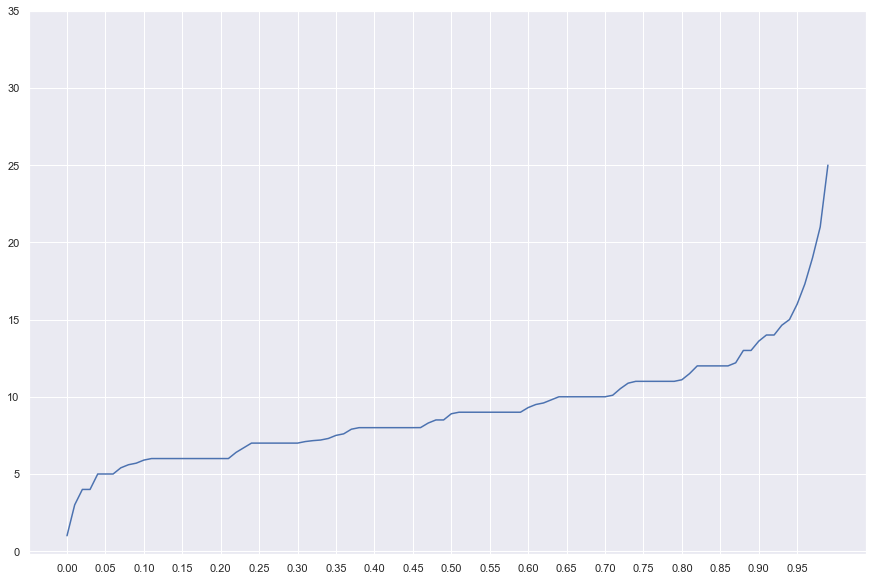

In [100]:
quantils = []
values = []

for i in np.arange(0, 1, 0.01):
    values.append(df['Square_Kitchen'].quantile(i))
    quantils.append(i)

plot = sns.lineplot(quantils, values)
plot.set_xticks(np.arange(0, 1,0.05))
plot.set_yticks(np.arange(0, 40, 5));

# Square_Living

In [101]:
print('Missing values:', sum(df['Square_Living'].isna()))
df['Square_Living'].describe()

Missing values: 6888


count    2796.000000
mean       32.907897
std        21.905629
min         0.000000
25%        18.000000
50%        30.000000
75%        40.000000
max       450.000000
Name: Square_Living, dtype: float64

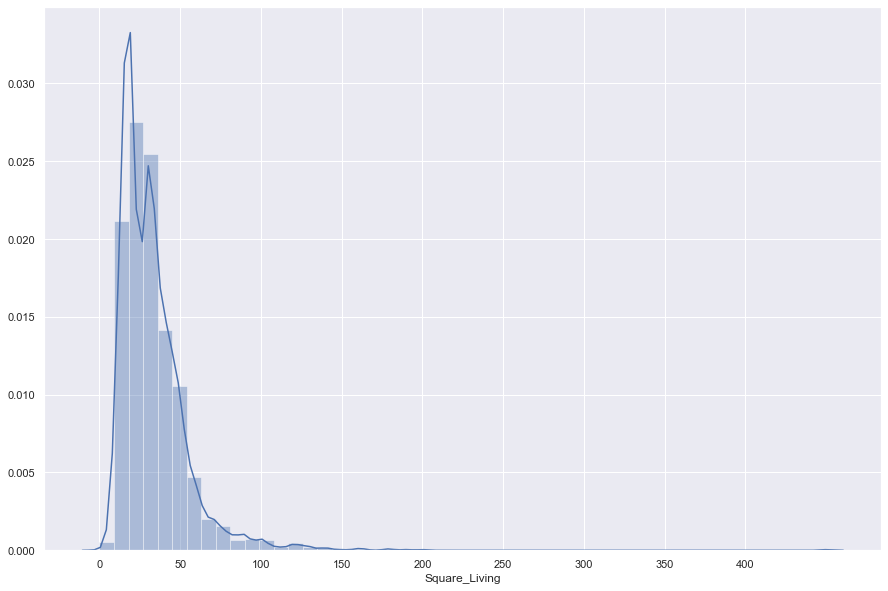

In [102]:
plot = sns.distplot(df['Square_Living'])
plot.set_xticks(np.arange(0, 450,50))
plt.show()

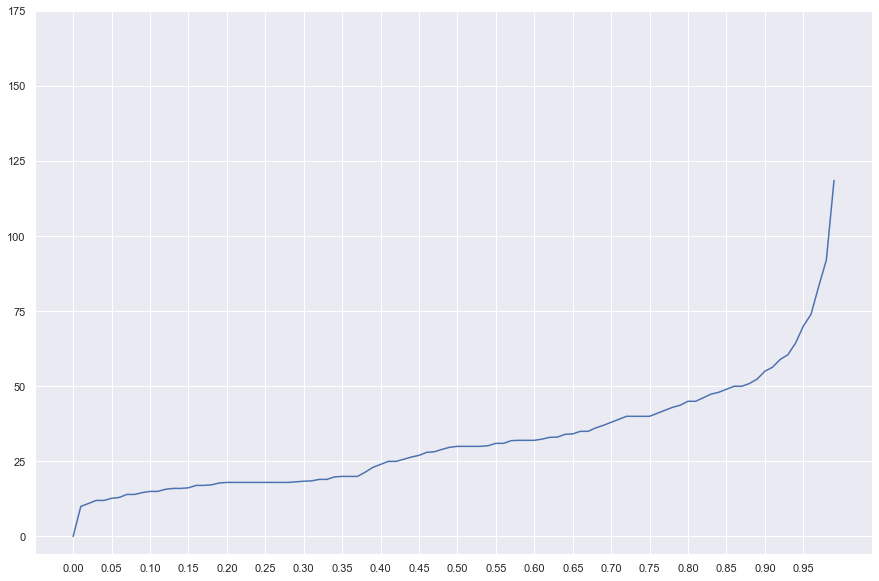

In [106]:
quantils = []
values = []

for i in np.arange(0, 1, 0.01):
    values.append(df['Square_Living'].quantile(i))
    quantils.append(i)

plot = sns.lineplot(quantils, values)
plot.set_xticks(np.arange(0, 1,0.05))
plot.set_yticks(np.arange(0, 200, 25));